In [1]:
!pip install datasets
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 8.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is in

In [2]:
from datasets import load_dataset
import pandas as pd
import numpy as np
import json

dataset = load_dataset('multi_eurlex', language='en',label_level='level_1',trust_remote_code=True)
df=pd.DataFrame(dataset['train'])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/47.8k [00:00<?, ?B/s]

multi_eurlex.py:   0%|          | 0.00/138k [00:00<?, ?B/s]

multi_eurlex.tar.gz:   0%|          | 0.00/2.77G [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

In [3]:
alls=[]
for a in df['labels']:
  alls.extend(a)
labels=np.array(list(range(np.max(alls)+1)))
dico=json.load(open('drive/MyDrive/eurovoc_descriptors.json'))
classlabel=dataset['train'].features['labels'].feature
meanings=[dico[lab]['en'] for lab in classlabel.int2str(labels)]

for label in labels:
  df[meanings[label]]=df['labels'].apply(lambda x: label in x)

df=df.drop(columns=['labels','celex_id'])

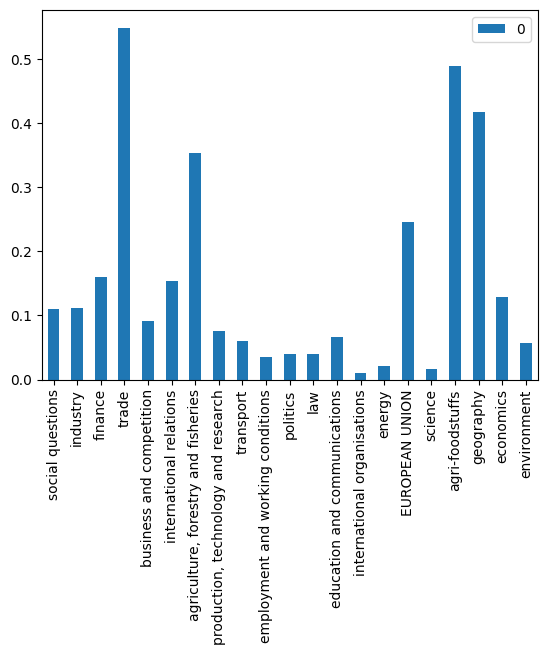

In [4]:
df2=pd.DataFrame(df.drop(columns=['text']).mean())
import matplotlib.pyplot as plt
df2.plot(kind='bar')
plt.show()


In [6]:
toremove=['member','state','states','commission','article', "accordance", 'decision', 'may', 'directive', 'regulation']
from wordcloud import WordCloud
STOPWORDS = [x.strip() for x in open('english_stop.txt').readlines()]
import matplotlib.pyplot as plt

full_texts={}

for meaning in meanings:
  full_text=' '.join(df[df[meaning]].text)
  full_text=' '.join([a for a in full_text.replace('\n',' ').lower().split(' ') if a!='' and a.replace('.','') not in (STOPWORDS+toremove)])
  full_texts[meaning]=full_text

social questions


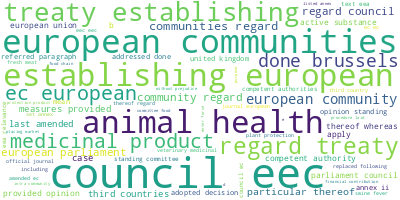

industry


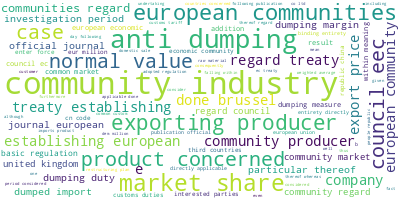

finance


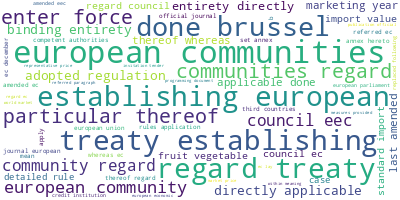

trade


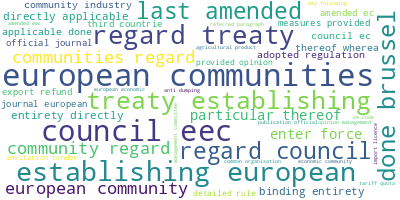

business and competition


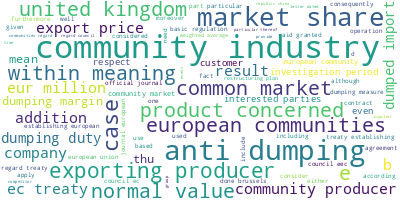

international relations


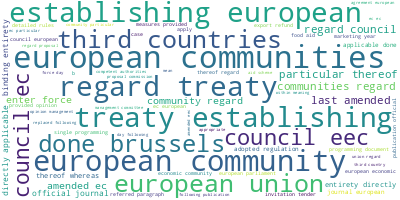

agriculture, forestry and fisheries


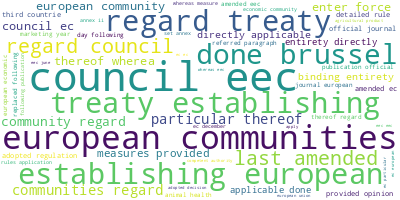

production, technology and research


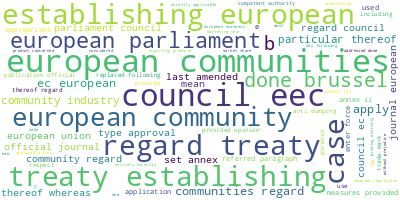

transport


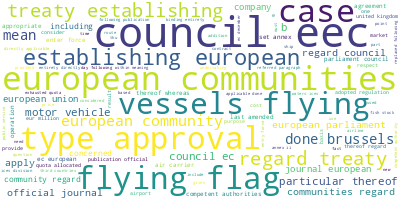

employment and working conditions


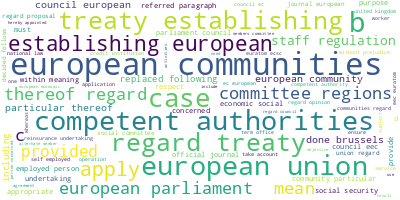

politics


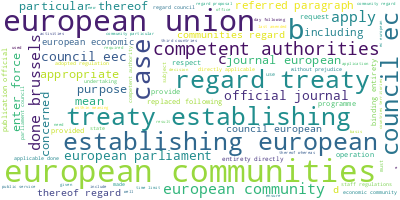

law


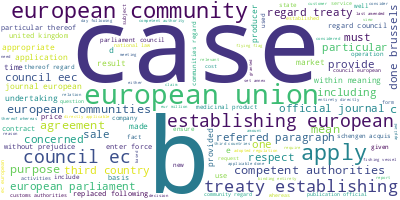

education and communications


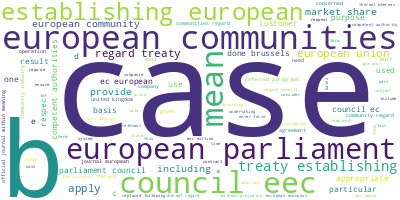

international organisations


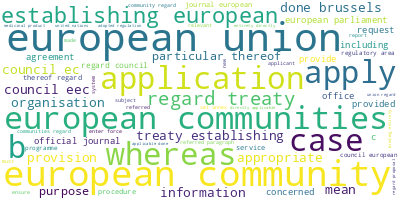

energy


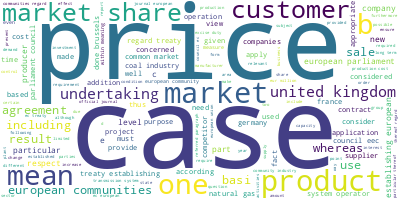

EUROPEAN UNION


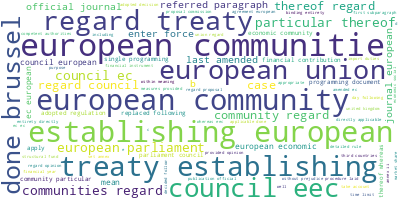

science


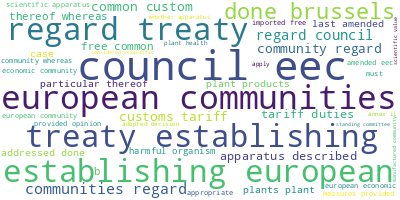

agri-foodstuffs


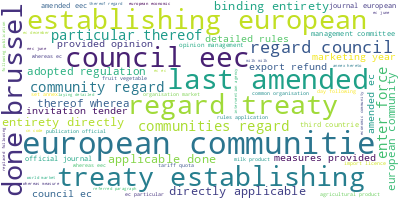

geography


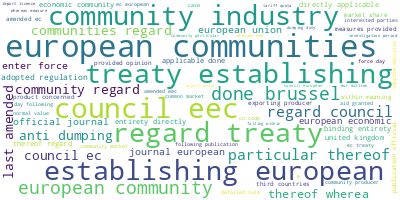

economics


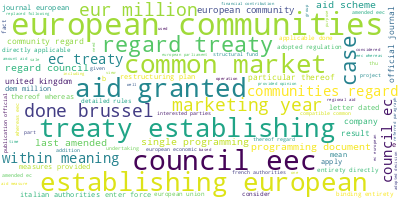

environment


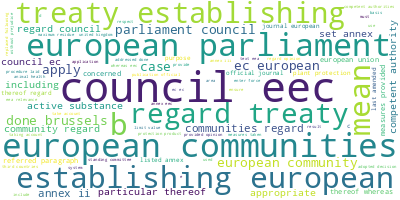

In [7]:
for meaning in full_texts:
  print(meaning)
  cloud=WordCloud(background_color='white')
  cloud.generate_from_text(full_texts[meaning])
  display(cloud.to_image())

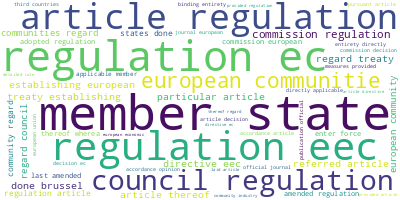

In [8]:

full_text=' '.join(df.text[np.random.rand(len(df))<0.5])
full_text=' '.join([a for a in full_text.replace('\n',' ').lower().split(' ') if a!='' and a.replace('.','') not in (STOPWORDS)])
full_texts['everything']=full_text

cloud=WordCloud(background_color='white')
cloud.generate_from_text(full_texts['everything'])
display(cloud.to_image())